In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
data = pd.read_csv('wimbledon_points.csv')
list(data)

['match_id',
 'ElapsedTime',
 'SetNo',
 'P1GamesWon',
 'P2GamesWon',
 'SetWinner',
 'GameNo',
 'GameWinner',
 'PointNumber',
 'PointWinner',
 'PointServer',
 'Speed_KMH',
 'Rally',
 'P1Score',
 'P2Score',
 'P1Momentum',
 'P2Momentum',
 'P1PointsWon',
 'P2PointsWon',
 'P1Ace',
 'P2Ace',
 'P1Winner',
 'P2Winner',
 'P1DoubleFault',
 'P2DoubleFault',
 'P1UnfErr',
 'P2UnfErr',
 'P1NetPoint',
 'P2NetPoint',
 'P1NetPointWon',
 'P2NetPointWon',
 'P1BreakPoint',
 'P2BreakPoint',
 'P1BreakPointWon',
 'P2BreakPointWon',
 'P1FirstSrvIn',
 'P2FirstSrvIn',
 'P1FirstSrvWon',
 'P2FirstSrvWon',
 'P1SecondSrvIn',
 'P2SecondSrvIn',
 'P1SecondSrvWon',
 'P2SecondSrvWon',
 'P1ForcedError',
 'P2ForcedError',
 'History',
 'Speed_MPH',
 'P1BreakPointMissed',
 'P2BreakPointMissed',
 'ServeIndicator',
 'Serve_Direction',
 'Winner_FH',
 'Winner_BH',
 'ServingTo',
 'P1TurningPoint',
 'P2TurningPoint',
 'ServeNumber',
 'WinnerType',
 'WinnerShotType',
 'P1DistanceRun',
 'P2DistanceRun',
 'RallyCount',
 'ServeWidth'

In [11]:
data.loc[data['match_id'] == '2017-wimbledon-1101']["P1FirstSrvIn"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
140   NaN
141   NaN
142   NaN
143   NaN
144   NaN
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
150   NaN
151   NaN
152   NaN
153   NaN
154   NaN
155   NaN
156   NaN
157   NaN
158   NaN
159   NaN
160   NaN
161   NaN
162   NaN
163   NaN
164   NaN
165   NaN
166   NaN
167   NaN
168   NaN
169   NaN
Name: P1FirstSrvIn, Length: 170, dtype: float64

In [4]:
## list completely missing data
[x for x in list(data) if (all(pd.isnull(data[x])) )]

['Rally',
 'P1FirstSrvIn',
 'P2FirstSrvIn',
 'P1FirstSrvWon',
 'P2FirstSrvWon',
 'P1SecondSrvIn',
 'P2SecondSrvIn',
 'P1SecondSrvWon',
 'P2SecondSrvWon',
 'P1ForcedError',
 'P2ForcedError',
 'Serve_Direction',
 'Winner_FH',
 'Winner_BH',
 'ServingTo',
 'P1TurningPoint',
 'P2TurningPoint']

In [5]:
## list partially missing data
[x for x in list(data) if (any(pd.isnull(data[x])) and not all(pd.isnull(data[x])) )]

['History', 'ServeNumber', 'ServeWidth', 'ServeDepth', 'ReturnDepth']

In [6]:
##list complete data
[x for x in list(data) if not any(pd.isnull(data[x]))]

['match_id',
 'ElapsedTime',
 'SetNo',
 'P1GamesWon',
 'P2GamesWon',
 'SetWinner',
 'GameNo',
 'GameWinner',
 'PointNumber',
 'PointWinner',
 'PointServer',
 'Speed_KMH',
 'P1Score',
 'P2Score',
 'P1Momentum',
 'P2Momentum',
 'P1PointsWon',
 'P2PointsWon',
 'P1Ace',
 'P2Ace',
 'P1Winner',
 'P2Winner',
 'P1DoubleFault',
 'P2DoubleFault',
 'P1UnfErr',
 'P2UnfErr',
 'P1NetPoint',
 'P2NetPoint',
 'P1NetPointWon',
 'P2NetPointWon',
 'P1BreakPoint',
 'P2BreakPoint',
 'P1BreakPointWon',
 'P2BreakPointWon',
 'Speed_MPH',
 'P1BreakPointMissed',
 'P2BreakPointMissed',
 'ServeIndicator',
 'WinnerType',
 'WinnerShotType',
 'P1DistanceRun',
 'P2DistanceRun',
 'RallyCount']

In [119]:
## get total number of player 1 unforced errors in first match
print data.loc[data['match_id'] == '2017-wimbledon-1101']["P1UnfErr"].sum()

## did they win?
## no direct data on this, but of course they won the match if they won the last point
print (data.loc[data['match_id'] == '2017-wimbledon-1101'][-1:]["PointWinner"]==1).item()

10
True


In [64]:
#info on last point of first match
data.loc[data['match_id'] == '2017-wimbledon-1101'][-1:]

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,...,P2TurningPoint,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount,ServeWidth,ServeDepth,ReturnDepth
169,2017-wimbledon-1101,1:58:17,3,6,2,1,8,1,169,1,...,NaN,2.0,0,0,19.431,12.769,5,BC,NCTL,ND


In [22]:
## probability to win vs. total unforced errors

## store number of p1 unforced errors and won/lost
## @TODO: why is this so slow!?
start = time.time()
mean_unferr=0
matches=data['match_id'].unique()
nmatches=len(matches)
win1, win2, win, unferrs = np.zeros(nmatches), np.zeros(nmatches), np.zeros(nmatches), np.zeros(nmatches)
for ix, x in enumerate(matches):
#    print data.loc [ data['match_id'] == x]["P1UnfErr"].sum()
    win1[ix] = 1 if (data.loc[data['match_id'] == x][-1:]["PointWinner"]==1).item() else 0
    win2[ix] = 1 if (data.loc[data['match_id'] == x][-1:]["PointWinner"]==2).item() else 0
    win[ix] = 1 if ((data.loc[data['match_id'] == x][-1:]["PointWinner"]==1).item() or (data.loc[data['match_id'] == x][-1:]["PointWinner"]==2).item()) else 0
    mean_unferr += data.loc [ data['match_id'] == x]["P1UnfErr"].sum()
    unferrs[ix] = data.loc [ data['match_id'] == x]["P1UnfErr"].sum()

mean_unferr /= len(data['match_id'].unique())
print mean_unferr, ' average unforced errors'   
print time.time()-start, 'seconds taken'

23  average unforced errors
8.39847803116 seconds taken


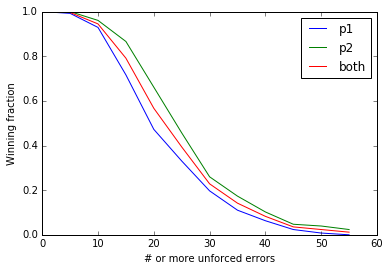

In [24]:
## for matches where player 1 won
## print fraction won vs. minimum no. unforced errors
## 
steps, prob1, prob2, prob = [], [], [], []
for step in xrange(0,60,5):
#    print step, sum([ unferrs[ix] >= step and win[ix]==1 for ix, x in enumerate(unferrs)])/float(sum(win))
    steps.append(step)
    prob1.append(sum([ unferrs[ix] >= step and win1[ix]==1 for ix, x in enumerate(unferrs)])/float(sum(win1)) )
    prob2.append(sum([ unferrs[ix] >= step and win2[ix]==1 for ix, x in enumerate(unferrs)])/float(sum(win2)) )
    prob.append(sum([ unferrs[ix] >= step and win[ix]==1 for ix, x in enumerate(unferrs)])/float(sum(win)) )
    
plt.xlabel("# or more unforced errors")
plt.ylabel("Winning fraction")
plt.plot(steps,prob1)
plt.plot(steps,prob2)
plt.plot(steps,prob)
plt.legend(['p1','p2','both'])
plt.show()
##this is saying: of those who won, who won with N or more unforced errors
## what about probability to win vs unforced errors
## = N(matches where p1 won with >= x unforced errors)/N(matches)
##  + N(matches where p2 won with >= x unforced errora)/N(matches)

In [10]:
print data.loc[data['match_id'] == '2017-wimbledon-1101'][-1:]["PointWinner"].item()

1


In [13]:
mean_unferr=0
matches=data['match_id'].unique()
nmatches=len(matches)

In [45]:
winner_unferrs, loser_unferrs = np.zeros(nmatches), np.zeros(nmatches)
winner_aces, loser_aces = np.zeros(nmatches), np.zeros(nmatches)
winner_winners, loser_winners = np.zeros(nmatches), np.zeros(nmatches)


for ix, x in enumerate(matches):
    #p1 won, p2 lost
    if (data.loc[data['match_id'] == x][-1:]["PointWinner"]==1).item():
        
        #unforced errors
        winner_unferrs[ix] += data.loc [ data['match_id'] == x]["P1UnfErr"].sum()
        loser_unferrs[ix] += data.loc [ data['match_id'] == x]["P2UnfErr"].sum()
        
        #aces
#        print 'match id:', x, 'aces:', data.loc [ data['match_id'] == x]["P1Ace"].sum()
        winner_aces[ix] += data.loc [ data['match_id'] == x]["P1Ace"].sum()
        loser_aces[ix] += data.loc [ data['match_id'] == x]["P2Ace"].sum()
        
        #winners
        winner_winners[ix] += data.loc [ data['match_id'] == x]["P1Winner"].sum()
        loser_winners[ix] += data.loc [ data['match_id'] == x]["P2Winner"].sum()
        
    #vice versa
    else:
        loser_unferrs[ix] += data.loc [ data['match_id'] == x]["P1UnfErr"].sum()
        winner_unferrs[ix] += data.loc [ data['match_id'] == x]["P2UnfErr"].sum()
        
        loser_aces[ix] += data.loc [ data['match_id'] == x]["P1Ace"].sum()
        winner_aces[ix] += data.loc [ data['match_id'] == x]["P2Ace"].sum()
        
        loser_winners[ix] += data.loc [ data['match_id'] == x]["P1Winner"].sum()
        winner_winners[ix] += data.loc [ data['match_id'] == x]["P2Winner"].sum()


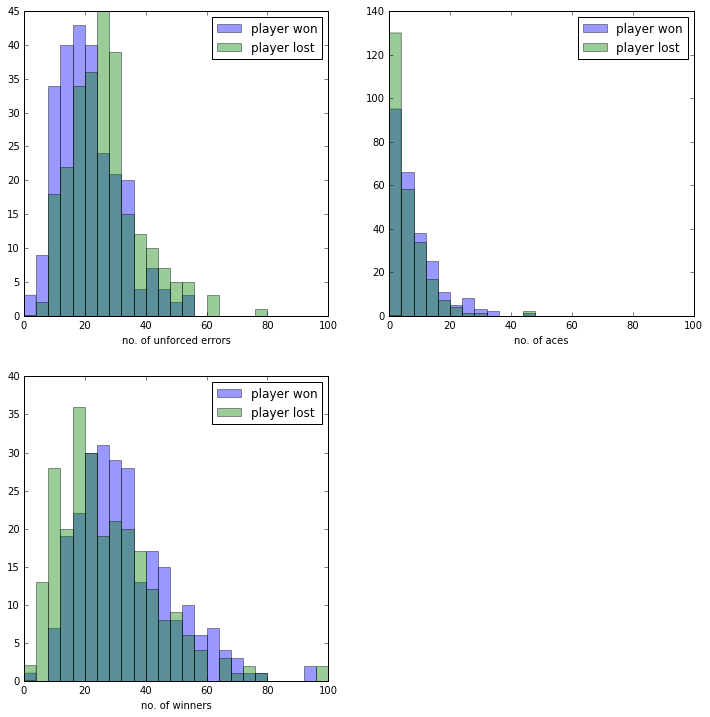

In [67]:
xmin, xmax, nbins = 0, 100, 25
plt.clf()
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.hist(winner_unferrs, bins=np.linspace(xmin,xmax,nbins+1), alpha=0.4, normed=False,label='player won')
plt.hist(loser_unferrs, bins=np.linspace(xmin,xmax,nbins+1), alpha=0.4, normed=False,label='player lost')
plt.xlabel('no. of unforced errors')
plt.legend()

plt.subplot(222)
plt.hist(winner_aces, bins=np.linspace(xmin,xmax,nbins+1), alpha=0.4, normed=False,label='player won')
plt.hist(loser_aces, bins=np.linspace(xmin,xmax,nbins+1), alpha=0.4, normed=False,label='player lost')
plt.xlabel('no. of aces')
plt.legend()
#plt.show()

plt.subplot(223)
plt.hist(winner_winners, bins=np.linspace(xmin,xmax,nbins+1), alpha=0.4, normed=False,label='player won')
plt.hist(loser_winners, bins=np.linspace(xmin,xmax,nbins+1), alpha=0.4, normed=False,label='player lost')
plt.xlabel('no. of winners')
plt.legend()
plt.show()

In [41]:
len(winner_aces)

254